In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.drop('Id', axis=1, inplace=True)

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Species = le.fit_transform(df.Species)

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
X = df.drop('Species', axis=1)
y = df.Species

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.25, random_state=5)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=5)

# Decision Tree Implementation

In [55]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()

clf.fit(X_train, y_train)
clf1.fit(X_train1, y_train1)
clf2.fit(X_train2, y_train2)


DecisionTreeClassifier()

# Support Vector Machine Implementation

In [62]:
from sklearn.svm import SVC

clf3 = SVC(kernel='linear')
clf4 = SVC(kernel='linear')
clf5 = SVC(kernel='linear')

clf3.fit(X_train, y_train)
clf4.fit(X_train1, y_train1)
clf5.fit(X_train2, y_train2)

SVC(kernel='linear')

# Naive Bayes Implementation

In [12]:
from sklearn.naive_bayes import GaussianNB

clf6 = GaussianNB()
clf7 = GaussianNB()
clf8 = GaussianNB()

clf6.fit(X_train, y_train)
clf7.fit(X_train1, y_train1)
clf8.fit(X_train2, y_train2)

GaussianNB()

# Function to store the results

In [63]:
models = []
test_sizes = []
accu = []

def store_results(model, test_size, acc):
    models.append(model)
    test_sizes.append(test_size)
    accu.append(round(acc, 3))

# Store the results

In [64]:
store_results('Decision Tree', 0.2, clf.score(X_test, y_test))
store_results('Decision Tree', 0.25, clf1.score(X_test1, y_test1))
store_results('Decision Tree', 0.3, clf2.score(X_test2, y_test2))

store_results('SVM', 0.2, clf3.score(X_test, y_test))
store_results('SVM', 0.25, clf4.score(X_test1, y_test1))
store_results('SVM', 0.3, clf5.score(X_test2, y_test2))

store_results('Naive Bayes', 0.2, clf6.score(X_test, y_test))
store_results('Naive Bayes', 0.25, clf7.score(X_test1, y_test1))
store_results('Naive Bayes', 0.3, clf8.score(X_test2, y_test2))

In [65]:
result = pd.DataFrame({
    'ML Model': models,
    'Test Size': test_sizes,
    'Accuracy': accu,
})

In [66]:
result

,ML Model,Test Size,Accuracy
0,Decision Tree,0.20,0.933
1,Decision Tree,0.25,0.921
2,Decision Tree,0.30,0.933
3,SVM,0.20,0.933
4,SVM,0.25,0.947
5,SVM,0.30,0.956
6,Naive Bayes,0.20,0.900
7,Naive Bayes,0.25,0.921
8,Naive Bayes,0.30,0.933


Text(0.5, 1.0, 'Comparison of Accuracy of Different Models')

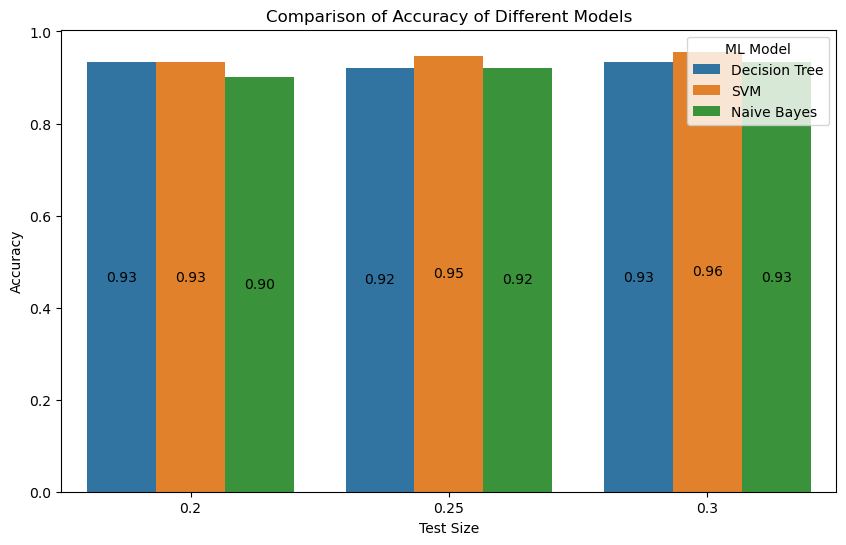

In [67]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x='Test Size', y='Accuracy', hue='ML Model', data=result, ax=ax)

for i in range(0,3):
    ax.bar_label(ax.containers[i], fmt='%.2f',  label_type='center')

ax.set_title('Comparison of Accuracy of Different Models')